# Entrenamiento CNN CIFAR-10

In [1]:
import tensorflow as tf
import tensorflow.keras as keras

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

2025-12-30 15:55:30.791089: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams.update({'font.size': 16})

### Obtención dataset CIFAR10

El conjunto de datos CIFAR10 contiene 60 000 imágenes en color en 10 clases, con 6000 imágenes en cada clase. El conjunto de datos se divide en 50 000 imágenes de entrenamiento y 10 000 imágenes de prueba. Las clases son mutuamente excluyentes y no hay superposición entre ellas.

In [6]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 406s 2us/step


In [ ]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

## Exploración

To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image.


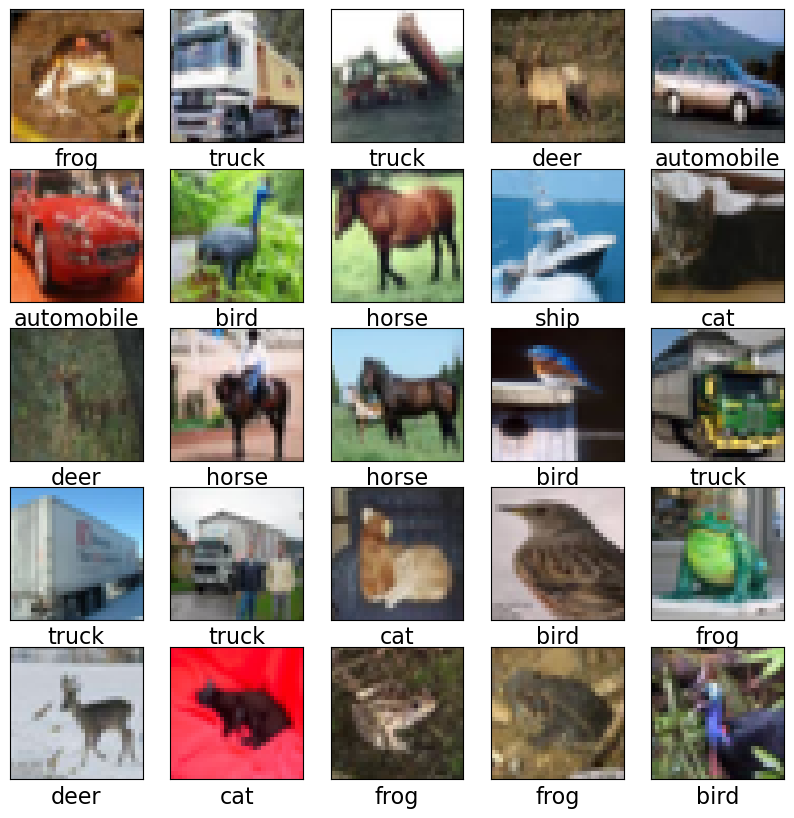

In [11]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

## Implementar arquitectura Fully Connected

In [ ]:
# Modelo (fully connected)
from tensorflow.keras import backend as K  # opcional, por si se requiere más adelante

fc_model = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')
])

fc_model.summary()

In [ ]:
# Entrenamiento modelo fully connected

fc_model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

fc_history = fc_model.fit(
    train_images, train_labels,
    epochs=10,
    batch_size=64,
    validation_data=(test_images, test_labels),
    verbose=2
)

In [ ]:
# Evaluacion modelo fully connected

test_loss_fc, test_acc_fc = fc_model.evaluate(test_images, test_labels, verbose=0)
print(f'Pérdida (FC) en test: {test_loss_fc:.4f}')
print(f'Exactitud (FC) en test: {test_acc_fc:.4f}')

In [ ]:
# grafico loss/accuracy v/s epoch para modelo fully connected

acc = fc_history.history['accuracy']
val_acc = fc_history.history['val_accuracy']
loss = fc_history.history['loss']
val_loss = fc_history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='accuracy')
plt.plot(epochs_range, val_acc, label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy - Fully Connected')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='loss')
plt.plot(epochs_range, val_loss, label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Loss - Fully Connected')

plt.tight_layout()
plt.show()

## Implementar Arquitectura CNN

In [ ]:
# Modelo CNN

cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn_model.summary()

In [ ]:
# Entrenamiento modelo CNN

cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

cnn_history = cnn_model.fit(
    train_images, train_labels,
    epochs=10,
    batch_size=64,
    validation_data=(test_images, test_labels),
    verbose=2
)

In [ ]:
# Evaluacion modelo CNN

test_loss_cnn, test_acc_cnn = cnn_model.evaluate(test_images, test_labels, verbose=0)
print(f'Pérdida (CNN) en test: {test_loss_cnn:.4f}')
print(f'Exactitud (CNN) en test: {test_acc_cnn:.4f}')

In [ ]:
# grafico loss/accuracy v/s epoch para modelo CNN

acc = cnn_history.history['accuracy']
val_acc = cnn_history.history['val_accuracy']
loss = cnn_history.history['loss']
val_loss = cnn_history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='accuracy')
plt.plot(epochs_range, val_acc, label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy - CNN')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='loss')
plt.plot(epochs_range, val_loss, label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Loss - CNN')

plt.tight_layout()
plt.show()

### Conclusiones

In [ ]:
# sus conclusiones

conclusiones = (
    "En este ejercicio se comparó un modelo totalmente conectado "
    "(fully connected) con una red convolucional (CNN) sobre CIFAR-10.\n\n"
    "La CNN aprovecha la estructura espacial de las imágenes mediante "
    "filtros convolutivos y pooling, por lo que típicamente alcanza una "
    "exactitud de prueba mayor y generaliza mejor que el modelo fully "
    "connected, que trata todos los píxeles como independientes.\n\n"
    "En general se observa que la CNN converge a una mejor combinación "
    "de baja pérdida y alta exactitud, mientras que el modelo fully "
    "connected tiende a sobreajustar con mayor facilidad y requiere más "
    "parámetros para lograr resultados comparables."
)

print(conclusiones)

---